In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from  sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv(r"C:\Users\hp\Downloads\employee.csv")

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [17]:
df_num=df.select_dtypes(include=np.number)

In [19]:
df_cat=df.select_dtypes(include=object)

In [23]:
from sklearn.preprocessing import LabelEncoder
df_cat_dummies=df_cat.apply(LabelEncoder().fit_transform)
df_cat_dummies.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,2,2,1,0,7,2,0,1
1,0,1,1,1,1,6,1,0,0
2,1,2,1,4,1,2,2,0,1
3,0,1,1,1,0,6,1,0,1
4,0,2,1,3,1,2,1,0,0


In [27]:
finaldf=pd.concat([df_num,df_cat_dummies],axis=1)
finaldf.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,41,1102,1,2,1,1,2,94,3,2,...,5,1,2,2,1,0,7,2,0,1
1,49,279,8,1,1,2,3,61,2,2,...,7,0,1,1,1,1,6,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,1,2,1,4,1,2,2,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,1,1,1,0,6,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,2,0,2,1,3,1,2,1,0,0


### Data partitioning

In [32]:
from sklearn.model_selection import train_test_split
x=finaldf.drop(['Attrition'],axis=1)
y=finaldf['Attrition']
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

## Model building

In [57]:
params={'min_samples_leaf':[100,150,80],
        'min_samples_split':[150,200,250],
        'max_depth':[3,4,5],
        'learning_rate':[0.7,0.6],
        'n_estimators':[5,6,10]}

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(random_state=10,loss="log_loss",criterion="squared_error")

from sklearn.model_selection import GridSearchCV

gscv_gbc=GridSearchCV(estimator=model,
                     param_grid=params,
                     verbose=1,
                     cv=4,
                     scoring='accuracy')

gscv_gbc.fit(X_train,y_train)

Fitting 4 folds for each of 162 candidates, totalling 648 fits


,estimator,GradientBoost...ndom_state=10)
,param_grid,"{'learning_rate': [0.7, 0.6], 'max_depth': [3, 4, ...], 'min_samples_leaf': [100, 150, ...], 'min_samples_split': [150, 200, ...], ...}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [60]:
gscv_gbc.best_params_

{'learning_rate': 0.7,
 'max_depth': 3,
 'min_samples_leaf': 80,
 'min_samples_split': 150,
 'n_estimators': 10}

In [85]:

finalmodel=GradientBoostingClassifier(** gscv_gbc.best_params_,random_state=99)
finalmodel.fit(X_train,y_train)

,loss,'log_loss'
,learning_rate,0.7
,n_estimators,10
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,150
,min_samples_leaf,80
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [95]:
Train=pd.concat([X_train,y_train],axis=1)
Train['preds']=finalmodel.predict(X_train)
from sklearn.metrics import classification_report
report=classification_report(Train['preds'],Train['Attrition'])
print(report)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       922
           1       0.54      0.84      0.66       107

    accuracy                           0.91      1029
   macro avg       0.76      0.88      0.80      1029
weighted avg       0.93      0.91      0.92      1029



In [97]:
Test=pd.concat([X_test,y_test],axis=1)
Test['preds']=finalmodel.predict(X_test)
report=classification_report(Test['preds'],Test['Attrition'])
print(report)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       407
           1       0.34      0.71      0.46        34

    accuracy                           0.87       441
   macro avg       0.66      0.80      0.69       441
weighted avg       0.92      0.87      0.89       441



## plotting Tree

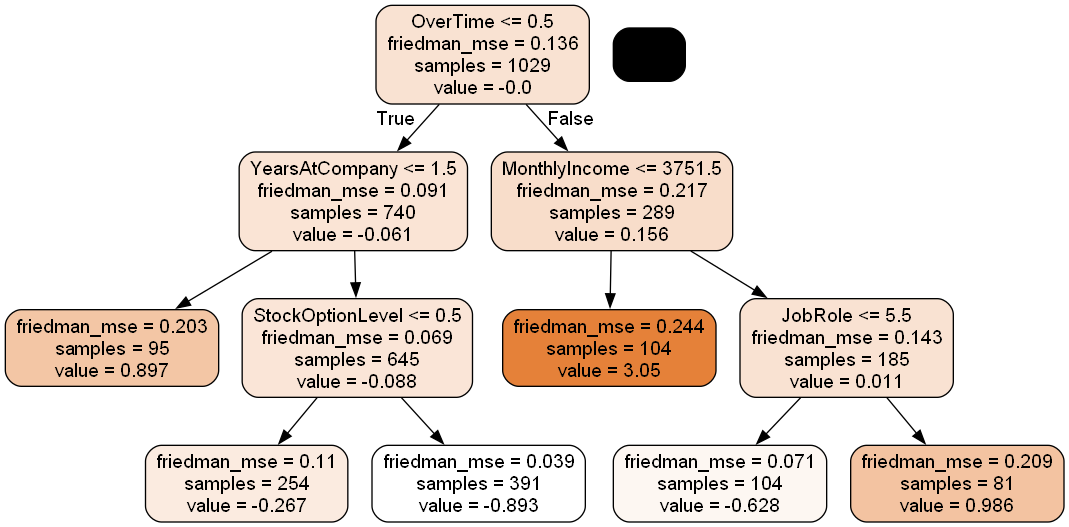

In [138]:
from sklearn.tree import export_graphviz
import pydotplus

independentvariables=list(x.columns)
Attrition=['0','1']

tree=finalmodel.estimators_[0,0]

export_graphviz(tree,out_file='abc.dot',
                feature_names=independentvariables,
                class_names=Attrition,
               filled=True,
               rounded=True)

graph=pydotplus.graph_from_dot_file('abc.dot')
graph.create_png()

from IPython.display import Image
Image(graph.create_png())

Text(0.5, 1.0, 'Important Features')

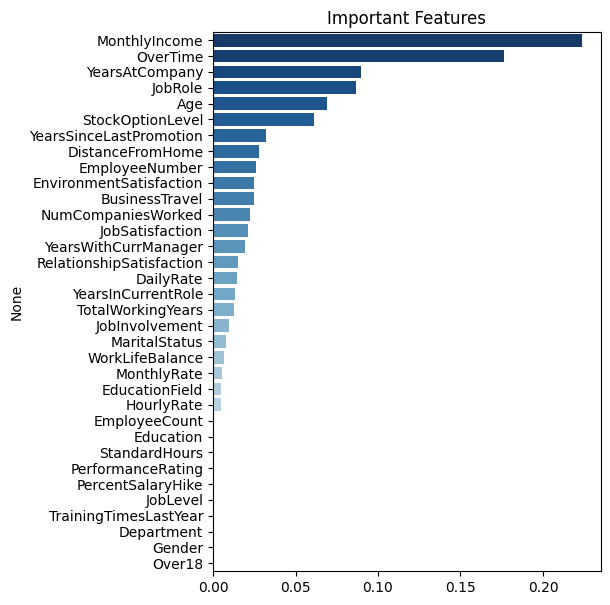

In [178]:
imp=pd.Series(data=finalmodel.feature_importances_,index=finalmodel.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(5,7))
sns.barplot(y=imp.index,x=imp.values,orient='h',palette="Blues_r")
plt.title("Important Features")

### XG Boosting

In [208]:
import xgboost as xgb
from xgboost import to_graphviz
from xgboost.sklearn import XGBClassifier

In [210]:
params={'n_samples_leaf':[50,100,70],
        'n_samples_split':[100,150,200],
        'learing_rate':[0.5,0.3],
        'max_depth':[5,6,7],
        'reg_lambda':[0,1],
       'n_estimators':[7,10,13]}

In [216]:
model2=XGBClassifier(random_state=100,loss="log_loss",criterion="squared_error")

from sklearn.model_selection import GridSearchCV

gsc_xgb=GridSearchCV(estimator=model2,
                    param_grid=params,
                    verbose=1,
                    cv=2,
                     n_jobs=-1,
                    scoring='accuracy')

gsc_xgb.fit(X_train,y_train)

Fitting 2 folds for each of 324 candidates, totalling 648 fits


,estimator,"XGBClassifier...ors=None, ...)"
,param_grid,"{'learing_rate': [0.5, 0.3], 'max_depth': [5, 6, ...], 'n_estimators': [7, 10, ...], 'n_samples_leaf': [50, 100, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,2
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [217]:
gsc_xgb.best_params_

{'learing_rate': 0.5,
 'max_depth': 5,
 'n_estimators': 13,
 'n_samples_leaf': 50,
 'n_samples_split': 100,
 'reg_lambda': 1}

In [228]:
finalmodel2=XGBClassifier(**gsc_xgb.best_params_)
finalmodel2.fit(X_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [242]:
finalmodel2.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'eval_metric': None,
 'gamma': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 5,
 'max_leaves': None,
 'min_child_weight': None,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': 1,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'learing_rate': 0.5,
 'n_samples_leaf': 50,
 'n_samples_split': 100}

In [284]:
parent_node={'shape':'box',
           'style':'rounded',
           'color':'#78cbec'}
child_node={'shape':'box',
          'style':['filled','rounded'],
          'color':'#e48038'}

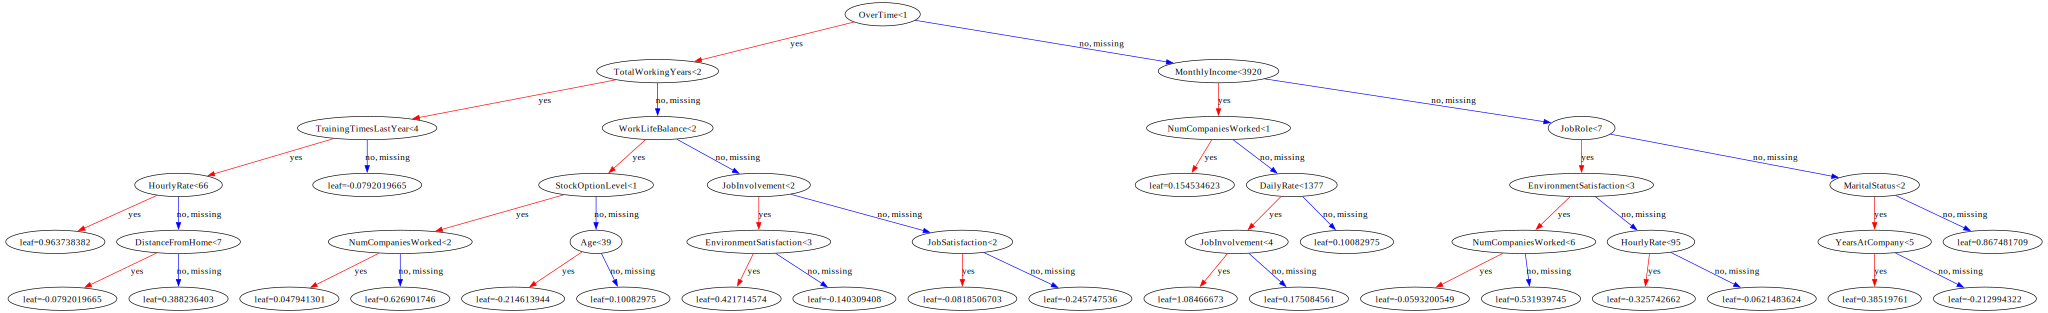

In [290]:
graph=to_graphviz(finalmodel2,tree_index=4)

graph

In [298]:
XGTrain=pd.concat([X_train,y_train],axis=1)
XGTrain['preds']=finalmodel2.predict(X_train)
report=classification_report(XGTrain['preds'],XGTrain['Attrition'])
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       888
           1       0.84      1.00      0.92       141

    accuracy                           0.97      1029
   macro avg       0.92      0.99      0.95      1029
weighted avg       0.98      0.97      0.98      1029



In [300]:
XGTest=pd.concat([X_test,y_test],axis=1)
XGTest['preds']=finalmodel2.predict(X_test)
report=classification_report(XGTest['preds'],XGTest['Attrition'])
print(report)

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       414
           1       0.26      0.67      0.37        27

    accuracy                           0.86       441
   macro avg       0.62      0.77      0.65       441
weighted avg       0.93      0.86      0.89       441



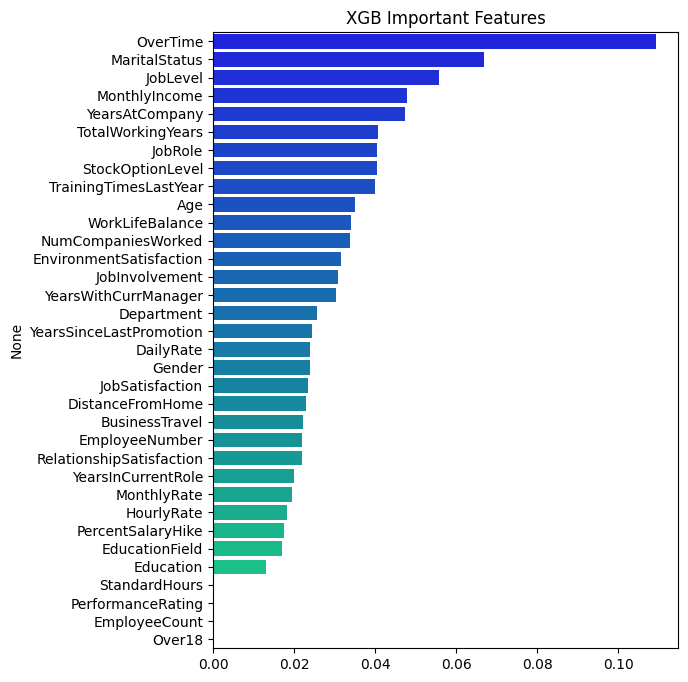

In [319]:
imp2=pd.Series(data=finalmodel2.feature_importances_,index=finalmodel2.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(6,8))
plt.title("XGB Important Features")
sns.barplot(y=imp2.index,x=imp2.values,palette='winter',orient='h')
plt.show()

## Finished